In [10]:
from common_utils import switch_graph, cr

In [3]:
graphs.OrthogonalArrayBlockGraph(2,2).adjacency_matrix()

[0 1 1 0]
[1 0 0 1]
[1 0 0 1]
[0 1 1 0]

In [4]:
cr(graphs.CompleteGraph(5))

'5\n  0   1   1   1   1 \n  1   0   1   1   1 \n  1   1   0   1   1 \n  1   1   1   0   1 \n  1   1   1   1   0 \nrank 2'

In [5]:
def delete_vertex(graph):
    new_graph = graph.copy()
    # removing the first vertex
    new_graph.delete_vertex(new_graph.vertices()[0])
    return new_graph

In [112]:
OA = graphs.OrthogonalArrayBlockGraph(2, 7)
switched_OA = switch_graph([OA.vertices()[0]], OA)        
result = cr(switched_OA)
results = result.split("\n")

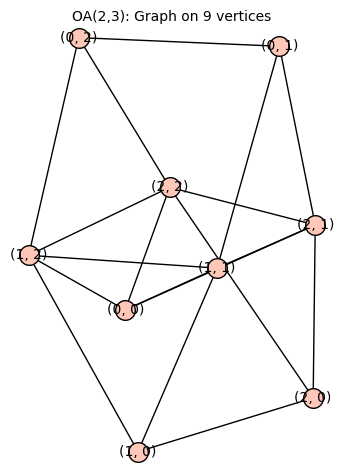

In [6]:
switch_graph([(0,0)], graphs.OrthogonalArrayBlockGraph(2, 3))

In [134]:
diags, matrix = results[1], results[3].split(" ")

In [135]:
c_configs = []

for i in range(int(results[0])):
    temp = []
    for j in range(int(results[0])):
        temp.append(int(matrix[i * int(results[0]) + j]))
    c_configs.append(temp)

c_configs

[[1, 8, 8, 8, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 13],
 [7, 0, 11, 11, 11, 10, 3, 3, 3, 15, 15, 15, 5, 5, 5],
 [7, 11, 0, 11, 11, 3, 10, 3, 3, 15, 5, 5, 15, 15, 5],
 [7, 11, 11, 0, 11, 3, 3, 10, 3, 5, 15, 5, 15, 5, 15],
 [7, 11, 11, 11, 0, 3, 3, 3, 10, 5, 5, 15, 5, 15, 15],
 [7, 10, 3, 3, 3, 0, 11, 11, 11, 15, 15, 15, 5, 5, 5],
 [7, 3, 10, 3, 3, 11, 0, 11, 11, 15, 5, 5, 15, 15, 5],
 [7, 3, 3, 10, 3, 11, 11, 0, 11, 5, 15, 5, 15, 5, 15],
 [7, 3, 3, 3, 10, 11, 11, 11, 0, 5, 5, 15, 5, 15, 15],
 [12, 14, 14, 4, 4, 14, 14, 4, 4, 2, 9, 9, 9, 9, 6],
 [12, 14, 4, 14, 4, 14, 4, 14, 4, 9, 2, 9, 9, 6, 9],
 [12, 14, 4, 4, 14, 14, 4, 4, 14, 9, 9, 2, 6, 9, 9],
 [12, 4, 14, 14, 4, 4, 14, 14, 4, 9, 9, 6, 2, 9, 9],
 [12, 4, 14, 4, 14, 4, 14, 4, 14, 9, 6, 9, 9, 2, 9],
 [12, 4, 4, 14, 14, 4, 4, 14, 14, 6, 9, 9, 9, 9, 2]]

In [136]:
diags = diags.split(" ")[:-1]
for i in range(len(diags)):
    diags[i] = int(diags[i])
l = diags
L = [ (l[i], i) for i in range(len(l)) ]

L.sort()
sorted_diag, perm = zip(*L)

In [133]:
g = graphs.CompleteGraph(6)
h = g.line_graph(labels=False)

switched_tri_graph = switch_graph([h.vertices()[0]], h)
result = cr(switched_tri_graph)
results = result.split("\n")

In [137]:
sorted_diag

(0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2)

In [138]:
perm

(1, 2, 3, 4, 5, 6, 7, 8, 0, 9, 10, 11, 12, 13, 14)

In [139]:
import numpy as np

def permutation_matrix(permutation):
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    
    # Place 1s according to the permutation list
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    
    return matrix

perm_matrix = permutation_matrix(perm)

In [140]:

c_matrix=np.array([np.array(xi) for xi in c_configs])


In [141]:
sorted_matrix = np.matmul(np.matmul(perm_matrix, c_matrix), np.transpose(perm_matrix))

In [36]:
def make_c(n):
    res = []
    for i in range(2 * n):
        tmp = []
        if i < n:
            for j in range(n**2):
                    if (j - i) % n == 0:
                        tmp.append(1)
                    else:
                        tmp.append(0)
        else:
            tmp = ([0] * n * (i - n)) + ([1] * n) + ([0] * n * (2*n - 1 - i))
                
        res.append(tmp)
    return Matrix(res)

In [12]:
graphs.RookGraph([3,3]).adjacency_matrix()

[0 1 1 1 0 0 1 0 0]
[1 0 1 0 1 0 0 1 0]
[1 1 0 0 0 1 0 0 1]
[1 0 0 0 1 1 1 0 0]
[0 1 0 1 0 1 0 1 0]
[0 0 1 1 1 0 0 0 1]
[1 0 0 1 0 0 0 1 1]
[0 1 0 0 1 0 1 0 1]
[0 0 1 0 0 1 1 1 0]

In [41]:
c = make_c(5)
m = c.T * c
print(m.str())

[2 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
[1 2 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
[1 1 2 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[1 1 1 2 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
[1 1 1 1 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 2 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
[0 1 0 0 0 1 2 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 2 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 1 1 1 2 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 2 1 1 1 1 1 0 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 1 2 1 1 1 0 1 0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 1 0 0 1 1 2 1 1 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 1 1 1 2 1 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 0 0 0 0 1]
[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 2 1 1 1 1 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 2 1 1 1 0 1 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 2 1 1 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 2 1 0 0 0 1 0]
[0 0 0 0 1 0

In [9]:
c = Matrix([
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1],
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1]
])
c.T * c

[2 1 1 1 0 0 1 0 0]
[1 2 1 0 1 0 0 1 0]
[1 1 2 0 0 1 0 0 1]
[1 0 0 2 1 1 1 0 0]
[0 1 0 1 2 1 0 1 0]
[0 0 1 1 1 2 0 0 1]
[1 0 0 1 0 0 2 1 1]
[0 1 0 0 1 0 1 2 1]
[0 0 1 0 0 1 1 1 2]

In [8]:
c2 = Matrix([
    [1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0],
    [0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0],
    [0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0],
    [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1],
    [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]
])
c2.T * c2

[2 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0]
[1 2 1 1 0 1 0 0 0 1 0 0 0 1 0 0]
[1 1 2 1 0 0 1 0 0 0 1 0 0 0 1 0]
[1 1 1 2 0 0 0 1 0 0 0 1 0 0 0 1]
[1 0 0 0 2 1 1 1 1 0 0 0 1 0 0 0]
[0 1 0 0 1 2 1 1 0 1 0 0 0 1 0 0]
[0 0 1 0 1 1 2 1 0 0 1 0 0 0 1 0]
[0 0 0 1 1 1 1 2 0 0 0 1 0 0 0 1]
[1 0 0 0 1 0 0 0 2 1 1 1 1 0 0 0]
[0 1 0 0 0 1 0 0 1 2 1 1 0 1 0 0]
[0 0 1 0 0 0 1 0 1 1 2 1 0 0 1 0]
[0 0 0 1 0 0 0 1 1 1 1 2 0 0 0 1]
[1 0 0 0 1 0 0 0 1 0 0 0 2 1 1 1]
[0 1 0 0 0 1 0 0 0 1 0 0 1 2 1 1]
[0 0 1 0 0 0 1 0 0 0 1 0 1 1 2 1]
[0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 2]

## Things to do
1. Create the type matrix function
   - just clean up until the permutation matrix part
   - apply it to adj matrix and config matrix
   - then from sorted config matrix, condense into the different blocks
2. Apply the whole thing to $OA(2, n)$ and $T(n)$ to observe
   - $OA(2, n)$ works because mostly CR = 15
   - $T(n)$ try to use $n$ = 6 and above since it converges to CR =  16
   - Try and see if the type matrices are all the same to show similarity

In [ ]:
OA = graphs.OrthogonalArrayBlockGraph(2, 7)
switched_OA = switch_graph([OA.vertices()[0]], OA)        
result = cr(switched_OA)
results = result.split("\n")
diags, matrix = results[1], results[3].split(" ")
config_matrix = []

for i in range(int(results[0])):
    temp = []
    for j in range(int(results[0])):
        temp.append(int(matrix[i * int(results[0]) + j]))
    config_matrix.append(temp)

config_matrix=np.array([np.array(xi) for xi in config_matrix])

diags = diags.split(" ")[:-1]
for i in range(len(diags)):
    diags[i] = int(diags[i])
l = diags
L = [ (l[i], i) for i in range(len(l)) ]

L.sort()
sorted_diag, perm = zip(*L)

import numpy as np

def permutation_matrix(permutation):
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    
    # Place 1s according to the permutation list
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    
    return matrix

perm_matrix = permutation_matrix(perm)

sorted_matrix = np.matmul(np.matmul(perm_matrix, config_matrix), np.transpose(perm_matrix))

for r in sorted_matrix:
    for j in r:
        print(f"{j:<3}", end=' ')
    print()

### Below code does the whole procedure to output the type matrix

In [180]:
import numpy as np

def permutation_matrix(permutation):
    """Create a permutation matrix from a given permutation list."""
    n = len(permutation)
    matrix = np.zeros((n, n), dtype=int)
    for i, row_index in enumerate(permutation):
        matrix[i, row_index] = 1
    return matrix

def get_intervals(lst):
    """Return intervals of consecutive identical elements in a sorted list."""
    intervals = []
    n = len(lst)
    start = 0
    
    for i in range(1, n + 1):
        if i == n or lst[i] != lst[start]:
            intervals.append((start, i - 1))
            start = i
            
    return intervals

def output_type_matrix(graph):
    switched_graph = switch_graph([graph.vertices()[0]], graph)
    results = cr(switched_graph).split("\n")
    
    dimension = int(results[0])
    diags = list(map(int, filter(None, results[1].split(" ")[:-1])))
    matrix_data = list(map(int, filter(None, results[3].split(" "))))
    
    config_matrix = np.array(matrix_data).reshape((dimension, dimension))
    
    sorted_diag, perm = zip(*sorted((value, index) for index, value in enumerate(diags)))
    
    perm_matrix = permutation_matrix(perm)
    sorted_matrix = perm_matrix @ config_matrix @ perm_matrix.T
    
    intervals = get_intervals(sorted_diag)
    res = []
    
    for i_start, i_end in intervals:
        tmp = []
        for j_start, j_end in intervals:
            
            # Use set comprehension to gather unique elements in the specified sub-matrix
            unique_elements = {sorted_matrix[row][col] for row in range(i_start, i_end + 1) for col in range(j_start, j_end + 1)}
            tmp.append(len(unique_elements))
        
        res.append(tmp)
    
    return res

def print_matrix(matrix):
    print(f"n = {n}")
    for row in res:
        print(row)
    print("\n")


In [181]:
print(f"For OA(2, n)")
print("-" * 40)
for n in range(3, 20):
    OA = graphs.OrthogonalArrayBlockGraph(2, n)
    type_matrix = output_type_matrix(OA)
    print_matrix(type_matrix)

For OA(2, n)
----------------------------------------
n = 3
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 4
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 5
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 6
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 7
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 8
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 9
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 10
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 11
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 12
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 13
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 14
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 15
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 16
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 17
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 18
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 19
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]




In [182]:
print(f"For T(n)")
print("-" * 40)
for n in range(3, 20):
    OA = graphs.CompleteGraph(n).line_graph()
    type_matrix = output_type_matrix(OA)
    print_matrix(type_matrix)

For T(n)
----------------------------------------
n = 3
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 4
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 5
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 6
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 7
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 8
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 9
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 10
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 11
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 12
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 13
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 14
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 15
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 16
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 17
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 18
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]


n = 19
[3, 1, 2]
[1, 1, 1]
[2, 1, 4]




### Now to apply the same to the adjacency matrix and to observe the subgraphs

In [79]:
from graph_models import *

In [26]:
# Open the file in write mode
with open("results/edge_switching/OA_n-1_n_test.txt", "w") as file:
    for n in range(4, 30):
        try:
            OA = designs.orthogonal_arrays.build(n+1, n)
            new_OA = []
            for i in OA:
                new_OA.append(i[2:])
                
            OA_graph = graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA)
            
            OA = FYP_Graph(OA_graph)

            switched_OA = OA.switch_graph(0)
            
            rank = switched_OA.get_coherent_rank()
            t_matrix = switched_OA.get_type_matrix()
            
            statement = f"Switching first vertex on OA({n-1}, {n}), {rank}\n\nType Matrix:\n"
            for row in t_matrix:
                statement += str(row) + "\n"
            print(statement)
            file.write(statement + "\n")
        except Exception as e:
            print(e)
            file.write(f"Error for OA({n-1}, {n}): {e}\n")


Switching first vertex on OA(3, 4), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

Switching first vertex on OA(4, 5), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

By the Bruck-Ryser theorem, no projective plane of order 6 exists.
Switching first vertex on OA(6, 7), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

Switching first vertex on OA(7, 8), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

Switching first vertex on OA(8, 9), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

No projective plane of order 10 exists by C. Lam, L. Thiel and S. Swiercz "The nonexistence of finite projective planes of order 10" (1989), Canad. J. Math.
Switching first vertex on OA(10, 11), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

I don't know how to build an OA(13,12)!
Switching first vertex on OA(12, 13), rank 15

Type Matrix:
(1, 1, 1)
(1, 3, 2)
(1, 2, 3)

By the Bruck-Ryser theorem, no projective plane of order 14 exists.
I don't know how to build an OA(16,15)!
S

In [145]:
n = 4

# to get the n-1 MOLS of order n
OA = designs.orthogonal_arrays.build(n+1, n)
new_OA = []
for i in OA:
    new_OA.append(i[2:]) # remove the "coordinate" columns
    
OA_graph = graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA)

OA = FYP_Graph(OA_graph)

switched_OA = OA.delete_vertex(0)

rank = switched_OA.get_coherent_rank()
t_matrix = switched_OA.get_type_matrix()
print(t_matrix)

# for i in new_OA:
#     print(i)

[3 2]
[2 3]


In [76]:
switched_OA.get_blocks()

[
[0 1 1 1 1 0 0 0 0]  [0 0 1 1 1 1]                                    
[1 0 1 0 0 1 1 0 0]  [1 1 0 0 1 1]                                    
[1 1 0 0 0 0 0 1 1]  [1 1 1 1 0 0]                                    
[1 0 0 0 1 1 0 1 0]  [1 1 0 1 0 1]  [0 1 1 1 1 0 1 1 0]  [0 1 1 0 0 1]
[1 0 0 1 0 0 1 0 1]  [1 1 1 0 1 0]  [0 1 1 1 1 1 0 0 1]  [1 0 0 1 1 0]
[0 1 0 1 0 0 1 1 0]  [0 1 1 1 1 0]  [1 0 1 0 1 1 1 1 0]  [1 0 0 1 1 0]
[0 1 0 0 1 1 0 0 1]  [1 0 1 1 0 1]  [1 0 1 1 0 1 1 0 1]  [0 1 1 0 0 1]
[0 0 1 1 0 1 0 0 1]  [1 0 1 0 1 1]  [1 1 0 0 1 1 0 1 1]  [0 1 1 0 0 1]
[0 0 1 0 1 0 1 1 0], [0 1 0 1 1 1], [1 1 0 1 0 0 1 1 1], [1 0 0 1 1 0]
]

In [71]:
A1 = switched_OA.get_blocks()[0]
A2 = switched_OA.get_blocks()[-1]
C = switched_OA.get_blocks()[1]

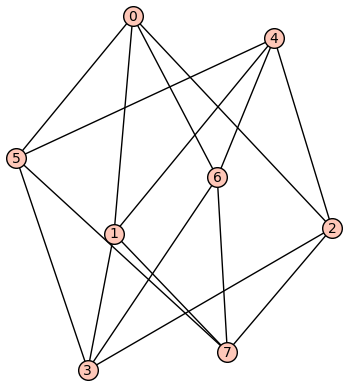

In [72]:
Graph(A1).show()

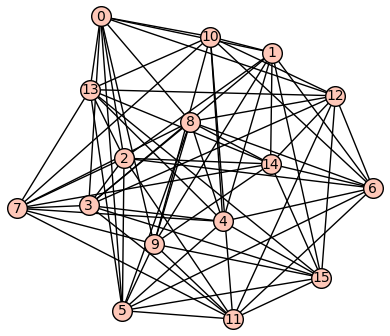

In [73]:
Graph(A2).show()

In [63]:
A1

[0 1 1 1 1 0 0 0 0]
[1 0 1 0 0 1 1 0 0]
[1 1 0 0 0 0 0 1 1]
[1 0 0 0 1 1 0 1 0]
[1 0 0 1 0 0 1 0 1]
[0 1 0 1 0 0 1 1 0]
[0 1 0 0 1 1 0 0 1]
[0 0 1 1 0 1 0 0 1]
[0 0 1 0 1 0 1 1 0]

In [64]:
A2

[0 1 1 0 0 1]
[1 0 0 1 1 0]
[1 0 0 1 1 0]
[0 1 1 0 0 1]
[0 1 1 0 0 1]
[1 0 0 1 1 0]

In [74]:
Graph(A2).is_isomorphic(graphs.OrthogonalArrayBlockGraph(2, 4))

False

In [81]:
# Open the file in write mode
for n in range(4, 30):
    try:
        OA = designs.orthogonal_arrays.build(n+1, n)
        new_OA = []
        for i in OA:
            new_OA.append(i[2:])
            
        OA_graph = graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA)
        
        OA = FYP_Graph(OA_graph)

        switched_OA = OA.delete_vertex(0)
        
        rank = switched_OA.get_coherent_rank()
        t_matrix = switched_OA.get_type_matrix()
        
        statement = f"Switching first vertex on OA({n-1}, {n}), {rank}\n\nType Matrix:\n"
        for row in t_matrix:
            statement += str(row) + "\n"
        print(statement)
        # file.write(statement + "\n")
    except Exception as e:
        print(e)
        # file.write(f"Error for OA({n-1}, {n}): {e}\n")


Switching first vertex on OA(3, 4), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(4, 5), rank 10

Type Matrix:
(3, 2)
(2, 3)

By the Bruck-Ryser theorem, no projective plane of order 6 exists.
Switching first vertex on OA(6, 7), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(7, 8), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(8, 9), rank 10

Type Matrix:
(3, 2)
(2, 3)

No projective plane of order 10 exists by C. Lam, L. Thiel and S. Swiercz "The nonexistence of finite projective planes of order 10" (1989), Canad. J. Math.
Switching first vertex on OA(10, 11), rank 10

Type Matrix:
(3, 2)
(2, 3)

I don't know how to build an OA(13,12)!
Switching first vertex on OA(12, 13), rank 10

Type Matrix:
(3, 2)
(2, 3)

By the Bruck-Ryser theorem, no projective plane of order 14 exists.
I don't know how to build an OA(16,15)!
Switching first vertex on OA(15, 16), rank 10

Type Matrix:
(3, 2)
(2, 3)

Switching first vertex on OA(16, 17), 

In [149]:
n = 4

# to get the n-1 MOLS of order n
OA = designs.orthogonal_arrays.build(n+1, n)
new_OA = []
for i in OA:
    new_OA.append(i[2:]) # remove the "coordinate" columns

OA_graph = FYP_Graph(graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA))
    
deleted_OA = OA_graph.delete_vertex(0)

rank = deleted_OA.get_coherent_rank()
t_matrix = deleted_OA.get_type_matrix()
print(t_matrix)

[3 2]
[2 3]


In [156]:
OA_graph.obj.complement().is_isomorphic(OA_Graph(2, 4).obj)


True

In [144]:
deleted_OA.get_blocks()

[
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1]
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1]
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0]
[0 1 0 1 0 1 0 1 1 0 1 0 0 1]  [1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]
[1 0 1 0 1 0 1 0 0 1 0 1 1 0]  [1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1

In [134]:
Matrix(OA_graph.obj.vertices()).T

[0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[0 3 1 2 2 1 3 0 3 0 2 1 1 2 0 3]
[0 2 3 1 2 0 1 3 3 1 0 2 1 3 2 0]

In [135]:
Matrix(deleted_OA.obj.vertices()).T

[0 0 0 1 1 1 1 2 2 2 2 3 3 3 3]
[3 1 2 2 1 3 0 3 0 2 1 1 2 0 3]
[2 3 1 2 0 1 3 3 1 0 2 1 3 2 0]

In [136]:
Matrix(new_OA).T

[0 2 3 1 3 1 0 2 1 3 2 0 2 0 1 3]
[0 3 1 2 2 1 3 0 3 0 2 1 1 2 0 3]
[0 3 1 2 3 0 2 1 1 2 0 3 2 1 3 0]

In [141]:
n = 8

# to get the n-1 MOLS of order n
OA = designs.orthogonal_arrays.build(n+1, n)
new_OA = []
for i in OA:
    new_OA.append(i[2:]) # remove the "coordinate" columns

OA_graph = FYP_Graph(graphs.OrthogonalArrayBlockGraph(n-1, n, new_OA))
    
deleted_OA = OA_graph.delete_vertex(0)

rank = deleted_OA.get_coherent_rank()
t_matrix = deleted_OA.get_type_matrix()
print(t_matrix)

[3 2]
[2 3]


In [142]:
A1 = deleted_OA.get_blocks()[0]
A2 = deleted_OA.get_blocks()[-1]

In [143]:
print(FYP_Graph(Graph(A1)).get_coherent_rank())
print(FYP_Graph(Graph(A2)).get_coherent_rank())

rank 3
rank 3


In [1]:
from graph_models import *

In [2]:
a = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, 3)).get_adjacency_matrix()
a

[0 1 1 1 0 0 1 0 0]
[1 0 1 0 1 0 0 1 0]
[1 1 0 0 0 1 0 0 1]
[1 0 0 0 1 1 1 0 0]
[0 1 0 1 0 1 0 1 0]
[0 0 1 1 1 0 0 0 1]
[1 0 0 1 0 0 0 1 1]
[0 1 0 0 1 0 1 0 1]
[0 0 1 0 0 1 1 1 0]

In [3]:
new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, 3)).switch_graph_edges([0,1,2])

In [4]:
new_g.get_adjacency_matrix()

[0 1 1 0 1 1 0 1 1]
[1 0 1 1 0 1 1 0 1]
[1 1 0 1 1 0 1 1 0]
[0 1 1 0 1 1 1 0 0]
[1 0 1 1 0 1 0 1 0]
[1 1 0 1 1 0 0 0 1]
[0 1 1 1 0 0 0 1 1]
[1 0 1 0 1 0 1 0 1]
[1 1 0 0 0 1 1 1 0]

In [6]:
new_g.get_coherent_rank()

'rank 10'

In [7]:
new_g.get_config_list()

[[[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 1]],
 [[1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0]],
 [[0, 0, 0, 1, 0, 0, 1, 0, 0],
  [0, 0, 0, 0, 1, 0, 0, 1, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0,

In [9]:
new_g.get_type_matrix()

[2 2]
[2 4]

In [11]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 10
[2 2]
[2 4]

For n: 8
rank 10
[2 2]
[2 4]

For n: 9
rank 10
[2 2]
[2 4]



In [21]:
for n in range(4, 30):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(3, n)).switch_graph_edges([i for i in range(n)])
    print(f"For (3, {n})")
    # print(new_g.get_adjacency_matrix())
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For (3, 4)
rank 3
[3]

For (3, 5)
rank 20
[ 2  3]
[ 3 12]

For (3, 6)
rank 68
[4 2 4 3]
[2 4 3 4]
[4 3 8 6]
[3 4 6 8]

For (3, 7)
rank 34
[ 2  4]
[ 4 24]

For (3, 8)
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

For (3, 9)
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

For (3, 10)
rank 144
[ 4  2  5  6]
[ 2  4  6  5]
[ 5  6 24 20]
[ 6  5 20 24]

For (3, 11)
rank 74
[ 2  6]
[ 6 60]

For (3, 12)
rank 288
[ 6  4  6  4  5  6]
[ 4  6  5  4  6  6]
[ 6  5 12  6 10 12]
[ 4  4  6 12  6 14]
[ 5  6 10  6 12 12]
[ 6  6 12 14 12 28]

For (3, 13)
rank 100
[ 2  7]
[ 7 84]

For (3, 14)
rank 252
[ 4  2  7  8]
[ 2  4  8  7]
[ 7  8 48 42]
[ 8  7 42 48]

For (3, 15)
rank 248
[ 4  4  6  8]
[ 4  8  8 16]
[ 6  8 24 32]
[ 8 16 32 64]

For (3, 16)
rank 332
[ 5  4  5  7  8]
[ 4  5  5  7  8]
[ 5  5 10 14 16]
[ 7  7 14 28 32]
[ 8  8 16 32 72]

For (3, 17)
rank 164
[  2   9]
[  9 144]

For (3, 18)
rank 562
[ 6  3  5  6  9 10]
[ 3  6  6  5 10  9]
[ 5  6 12 10 20 18]
[ 6  5 10 12 18 20]
[ 9 10 20 18 60

KeyboardInterrupt: 

In [20]:
n = 5
original = OA_Graph(3, n)
print(original.get_adjacency_matrix())
print(factor(original.get_adjacency_matrix().charpoly()))
print()

new_g = original.switch_graph_edges([i for i in range(n)])
print(new_g.get_adjacency_matrix())
print()

print(f"For (3, {n})")

print(new_g.get_coherent_rank())
print(new_g.get_type_matrix())
print()

[0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0]
[1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0]
[1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0]
[1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1]
[1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
[1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0]
[0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0]
[0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1]
[0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0]
[1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1]
[1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0]
[0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1]
[0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0]
[1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0]
[0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1]
[1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1]
[0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0]
[1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0]
[0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0]
[0 0 1 0 1 0

In [1]:
from graph_models import *

In [52]:
n = 6

deleted_graph = OA_Graph(2,n).delete_vertex(0)

In [53]:
deleted_graph.get_coherent_rank()

'rank 10'

In [54]:
blocks = deleted_graph.get_blocks()
blocks

[
[0 1 1 1 1 0 0 0 0 0]
[1 0 1 1 1 0 0 0 0 0]
[1 1 0 1 1 0 0 0 0 0]
[1 1 1 0 1 0 0 0 0 0]
[1 1 1 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 1 1 1]
[0 0 0 0 0 1 0 1 1 1]
[0 0 0 0 0 1 1 0 1 1]
[0 0 0 0 0 1 1 1 0 1]
[0 0 0 0 0 1 1 1 1 0],

[1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
[0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1]
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1],

25 x 10 dense matrix over Integer Ring,

25 x 25 dense matrix over Integer Ring
]

In [55]:
A1 = blocks[0]
A2 = blocks[3]
C = blocks[1]
J = Matrix([[1]*(n-1)**2]*2*(n-1))

In [56]:
C*A2

[4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1]
[1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1]
[1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1]
[1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1]
[1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4 1 1 1 1 4]
[4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4]

In [57]:
(n-3)*C + J == C * A2

True

In [58]:
A1 * C

[0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1]
[1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1]
[1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]

In [59]:
J - C == A1 * C

True

In [63]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 10
[2 2]
[2 4]

For n: 8
rank 10
[2 2]
[2 4]

For n: 9
rank 10
[2 2]
[2 4]



In [68]:
n=4
new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
print(f"For n: {n}")
print(new_g.get_blocks()[0])
print(new_g.get_blocks()[-1])

For n: 4
[0 1 1 1]
[1 0 1 1]
[1 1 0 1]
[1 1 1 0]
[0 1 1 1 1 0 0 0 1 0 0 0]
[1 0 1 1 0 1 0 0 0 1 0 0]
[1 1 0 1 0 0 1 0 0 0 1 0]
[1 1 1 0 0 0 0 1 0 0 0 1]
[1 0 0 0 0 1 1 1 1 0 0 0]
[0 1 0 0 1 0 1 1 0 1 0 0]
[0 0 1 0 1 1 0 1 0 0 1 0]
[0 0 0 1 1 1 1 0 0 0 0 1]
[1 0 0 0 1 0 0 0 0 1 1 1]
[0 1 0 0 0 1 0 0 1 0 1 1]
[0 0 1 0 0 0 1 0 1 1 0 1]
[0 0 0 1 0 0 0 1 1 1 1 0]


In [79]:
n=5
new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n))
print(sum(new_g.get_adjacency_matrix()))
new_g = new_g.switch_graph_edges([i for i in range(n)])
print(f"For n: {n}")
# print(new_g.get_blocks()[0])
# print(new_g.get_blocks()[1])
# print()
# print(new_g.get_blocks()[-1])

(8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8)
For n: 5


In [87]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 10
[2 2]
[2 4]

For n: 8
rank 10
[2 2]
[2 4]

For n: 9
rank 10
[2 2]
[2 4]



In [88]:
for n in range(3, 10):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(2*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 10
[2 2]
[2 4]

For n: 4
rank 3
[3]

For n: 5
rank 12
[4 2]
[2 4]

For n: 6
rank 12
[4 2]
[2 4]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 12
[4 2]
[2 4]

For n: 9
rank 12
[4 2]
[2 4]



In [90]:
for n in range(3, 20):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(3*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 3
[3]

For n: 4
rank 10
[2 2]
[2 4]

For n: 5
rank 12
[4 2]
[2 4]

For n: 6
rank 6
[6]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 12
[4 2]
[2 4]

For n: 9
rank 12
[4 2]
[2 4]

For n: 10
rank 12
[4 2]
[2 4]

For n: 11
rank 12
[4 2]
[2 4]

For n: 12
rank 12
[4 2]
[2 4]

For n: 13
rank 12
[4 2]
[2 4]

For n: 14
rank 12
[4 2]
[2 4]

For n: 15
rank 12
[4 2]
[2 4]

For n: 16
rank 12
[4 2]
[2 4]

For n: 17
rank 12
[4 2]
[2 4]

For n: 18
rank 12
[4 2]
[2 4]

For n: 19
rank 12
[4 2]
[2 4]



In [92]:
for n in range(4, 20):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(4*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 4
rank 3
[3]

For n: 5
rank 10
[2 2]
[2 4]

For n: 6
rank 12
[4 2]
[2 4]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 6
[6]

For n: 9
rank 12
[4 2]
[2 4]

For n: 10
rank 12
[4 2]
[2 4]

For n: 11
rank 12
[4 2]
[2 4]

For n: 12
rank 12
[4 2]
[2 4]

For n: 13
rank 12
[4 2]
[2 4]

For n: 14
rank 12
[4 2]
[2 4]

For n: 15
rank 12
[4 2]
[2 4]

For n: 16
rank 12
[4 2]
[2 4]

For n: 17
rank 12
[4 2]
[2 4]

For n: 18
rank 12
[4 2]
[2 4]

For n: 19
rank 12
[4 2]
[2 4]



In [93]:
for n in range(5, 20):
    new_g = FYP_Graph(graphs.OrthogonalArrayBlockGraph(2, n)).switch_graph_edges([i for i in range(5*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 5
rank 3
[3]

For n: 6
rank 10
[2 2]
[2 4]

For n: 7
rank 12
[4 2]
[2 4]

For n: 8
rank 12
[4 2]
[2 4]

For n: 9
rank 12
[4 2]
[2 4]

For n: 10
rank 6
[6]

For n: 11
rank 12
[4 2]
[2 4]

For n: 12
rank 12
[4 2]
[2 4]

For n: 13
rank 12
[4 2]
[2 4]

For n: 14
rank 12
[4 2]
[2 4]

For n: 15
rank 12
[4 2]
[2 4]

For n: 16
rank 12
[4 2]
[2 4]

For n: 17
rank 12
[4 2]
[2 4]

For n: 18
rank 12
[4 2]
[2 4]

For n: 19
rank 12
[4 2]
[2 4]



In [103]:
tri = OA_Graph(2,10)
tri = tri.switch_graph_edges([i for i in range(len(tri.obj.vertices())/2)])
tri.get_type_matrix()

[6]

In [104]:
for n in range(3, 20):
    new_g = OA_Graph(3,n).switch_graph_edges([i for i in range(n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 9
[2 2]
[2 3]

For n: 4
rank 3
[3]

For n: 5
rank 20
[ 2  3]
[ 3 12]

For n: 6
rank 68
[4 2 3 4]
[2 4 4 3]
[3 4 8 6]
[4 3 6 8]

For n: 7
rank 34
[ 2  4]
[ 4 24]

For n: 8
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

For n: 9
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

For n: 10
rank 144
[ 4  2  6  5]
[ 2  4  5  6]
[ 6  5 24 20]
[ 5  6 20 24]

For n: 11
rank 74
[ 2  6]
[ 6 60]

For n: 12
rank 288
[ 6  4  4  5  6  6]
[ 4  6  4  6  5  6]
[ 4  4 12  6  6 14]
[ 5  6  6 12 10 12]
[ 6  5  6 10 12 12]
[ 6  6 14 12 12 28]

For n: 13
rank 100
[ 2  7]
[ 7 84]

For n: 14
rank 252
[ 4  2  7  8]
[ 2  4  8  7]
[ 7  8 48 42]
[ 8  7 42 48]

For n: 15
rank 248
[ 4  4  6  8]
[ 4  8  8 16]
[ 6  8 24 32]
[ 8 16 32 64]

For n: 16
rank 332
[ 5  4  5  7  8]
[ 4  5  5  7  8]
[ 5  5 10 14 16]
[ 7  7 14 28 32]
[ 8  8 16 32 72]

For n: 17
rank 164
[  2   9]
[  9 144]

For n: 18
rank 562
[ 6  3  6  5 10  9]
[ 3  6  5  6  9 10]
[ 6  5 12 10 20 18]
[ 5  6 10 12 18 20]
[10  9 20 18 60 

In [105]:
for n in range(3, 20):
    new_g = OA_Graph(3,n).switch_graph_edges([i for i in range(2*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 9
[2 2]
[2 3]

For n: 4
rank 3
[3]

For n: 5
rank 39
[3 3 3]
[3 6 6]
[3 6 6]

For n: 6
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

For n: 7
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

For n: 8
rank 144
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]

For n: 9
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]

For n: 10
rank 275
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]
[11 11 11 11 11]

For n: 11
rank 366
[ 6  6  6  6  6  6]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]
[ 6 12 12 12 12 12]

For n: 12
rank 468
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]
[13 13 13 13 13 13]

For n: 13
rank 595
[ 7  7  7  7  7  7  7]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]
[ 7 14 14 14 14 14 14]

For n: 14
rank 735
[15 15 15 15 15 15 15]
[15 15 15 15 15 15 15]
[15 15 15 15 

In [106]:
for n in range(3, 10):
    new_g = OA_Graph(3,n).switch_graph_edges([i for i in range(3*n)])
    print(f"For n: {n}")
    print(new_g.get_coherent_rank())
    print(new_g.get_type_matrix())
    print()

For n: 3
rank 3
[3]

For n: 4
rank 3
[3]

For n: 5
rank 39
[3 3 3]
[3 6 6]
[3 6 6]

For n: 6
rank 3
[3]

For n: 7
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

For n: 8
rank 150
[ 5  3  4  4  5]
[ 3  5  4  4  5]
[ 4  4 10 10  8]
[ 4  4 10 10  8]
[ 5  5  8  8 10]

For n: 9
rank 205
[ 5  5  5  5  5]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]
[ 5 10 10 10 10]



### For OA$(2,n)$

In [148]:
for n in range(3,20):
    print("-"*30)
    print(f"n: {n}")
    for k in range(1,n//2+1):
        graph = OA_Graph(2,n)
        switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
        print(f"Switching {k} blocks")
        print(switched_graph.get_coherent_rank())
        print(switched_graph.get_type_matrix())
        print()
    print()

------------------------------
n: 3
Switching 1 blocks
rank 10
[2 2]
[2 4]


------------------------------
n: 4
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 3
[3]


------------------------------
n: 5
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]


------------------------------
n: 6
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 6
[6]


------------------------------
n: 7
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 12
[4 2]
[2 4]


------------------------------
n: 8
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 12
[4 2]
[2 4]

Switching 4 blocks
rank 6
[6]


------------------------------
n: 9
Switching 1 blocks
rank 10
[2 2]
[2 4]

Switching 2 blocks
rank 12
[4 2]
[2 4]

Switching 3 blocks
rank 12
[4 2]
[2 4]

Switching 4 blocks
rank 12
[4 2]
[2 4]


--------

### For OA$(3,n)$

In [149]:
for n in range(3,16):
    # n = 16 took too long to run
    print("-"*30)
    print(f"n: {n}")
    for k in range(1,n // 2 + 1):
        graph = OA_Graph(3,n)
        switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
        print(f"Switching {k} blocks")
        print(switched_graph.get_coherent_rank())
        print(switched_graph.get_type_matrix())
        print()
    print()

------------------------------
n: 3
Switching 1 blocks
rank 9
[2 2]
[2 3]


------------------------------
n: 4
Switching 1 blocks
rank 3
[3]

Switching 2 blocks
rank 3
[3]


------------------------------
n: 5
Switching 1 blocks
rank 20
[ 2  3]
[ 3 12]

Switching 2 blocks
rank 39
[3 3 3]
[3 6 6]
[3 6 6]


------------------------------
n: 6
Switching 1 blocks
rank 68
[4 2 3 4]
[2 4 4 3]
[3 4 8 6]
[4 3 6 8]

Switching 2 blocks
rank 63
[7 7 7]
[7 7 7]
[7 7 7]

Switching 3 blocks
rank 3
[3]


------------------------------
n: 7
Switching 1 blocks
rank 34
[ 2  4]
[ 4 24]

Switching 2 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]

Switching 3 blocks
rank 100
[4 4 4 4]
[4 8 8 8]
[4 8 8 8]
[4 8 8 8]


------------------------------
n: 8
Switching 1 blocks
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

Switching 2 blocks
rank 144
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]
[9 9 9 9]

Switching 3 blocks
rank 150
[ 5  3  4  5  4]
[ 3  5  4  5  4]
[ 4  4 10  8 10]
[ 5  5  8 10  8]


In [152]:
for n in range(3,30):
    print("-"*30)
    print(f"n: {n}")
    k = 1
    graph = OA_Graph(3,n)
    switched_graph = graph.switch_graph_edges([i for i in range(k*n)])
    print(f"Switching {k} blocks")
    print(switched_graph.get_coherent_rank())
    print(switched_graph.get_type_matrix())
    print()

------------------------------
n: 3
Switching 1 blocks
rank 9
[2 2]
[2 3]

------------------------------
n: 4
Switching 1 blocks
rank 3
[3]

------------------------------
n: 5
Switching 1 blocks
rank 20
[ 2  3]
[ 3 12]

------------------------------
n: 6
Switching 1 blocks
rank 68
[4 2 4 3]
[2 4 3 4]
[4 3 8 6]
[3 4 6 8]

------------------------------
n: 7
Switching 1 blocks
rank 34
[ 2  4]
[ 4 24]

------------------------------
n: 8
Switching 1 blocks
rank 90
[ 4  3  4  4]
[ 3  4  4  4]
[ 4  4  8  8]
[ 4  4  8 20]

------------------------------
n: 9
Switching 1 blocks
rank 75
[ 3  3  5]
[ 3  6 10]
[ 5 10 30]

------------------------------
n: 10
Switching 1 blocks
rank 144
[ 4  2  5  6]
[ 2  4  6  5]
[ 5  6 24 20]
[ 6  5 20 24]

------------------------------
n: 11
Switching 1 blocks
rank 74
[ 2  6]
[ 6 60]

------------------------------
n: 12
Switching 1 blocks
rank 288
[ 6  4  4  6  5  6]
[ 4  6  4  5  6  6]
[ 4  4 12  6  6 14]
[ 6  5  6 12 10 12]
[ 5  6  6 10 12 12]
[ 6  6 14